<a href="https://colab.research.google.com/github/desouki76/Ahmed/blob/main/Copy_of_Bike_Rental_Demand_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1- Import Lib
#1.1 Basic Lib

In [1]:
import numpy as np #numbering
import pandas as pd #Data Framing
import matplotlib.pyplot as plt  #Grpahgh and lib
import seaborn as sns #visulization



# 1.2 import *ML* Lib

In [2]:
from sklearn.model_selection import train_test_split  #Split Data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder #Scale and2kindsencoding class

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#Missing values
from sklearn.impute import SimpleImputer

#1.3import NN Nueral network Lib

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
#add optmization tech, and fuklly connected NN
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
#early stopping
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint


**#2- Import/Load Data**




In [4]:
#Load Data to Google
from google.colab import files
uploaded = files.upload()




Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [5]:
df_d=pd.read_csv('day.csv')
df_h= pd.read_csv('hour.csv')


In [6]:
df_d.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#some times data engineer pass data as it is correct but data scientiect cheacks the explansion of the data

In [8]:
print(df_d['cnt'].min())


22


In [9]:
print (df_d['cnt'].max() )


8714


#Define Skewness
Normal
Left Skewness
Right Skewness
ياثر سلبي على شكل البينات و فهم موديل لها لذا نلحا الى تطبث اللLog  عشان يزبط المعلومات  
to determaint it draw the data to under stand this

1st way to detect the data skew

<Axes: ylabel='temp'>

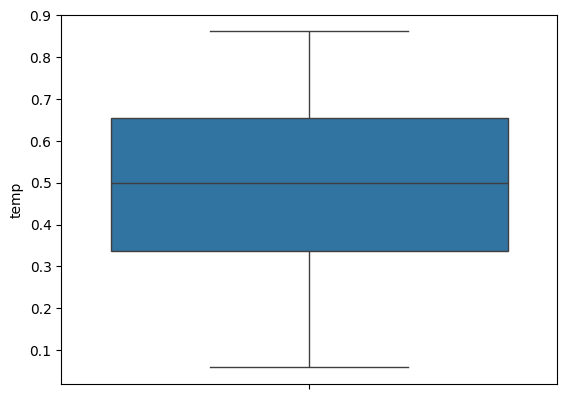

In [10]:
sns.boxplot(df_d['temp'])

Detect skew with another way rather than Grpah and Plot
Skew > 0  ----- Postive Skew
Skew < 0 ------ Negtive Skew

Skew = 0 or near 0 ---- Normal DIstrbution
in this (postive / Negtive) we will need to apply Log to the Data

<Axes: ylabel='windspeed'>

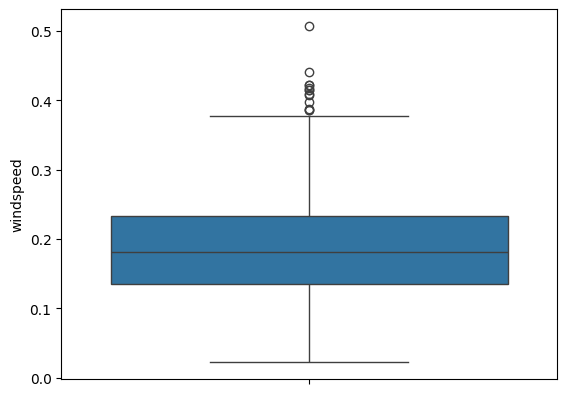

In [11]:
sns.boxplot(df_d['windspeed'])

<Axes: ylabel='casual'>

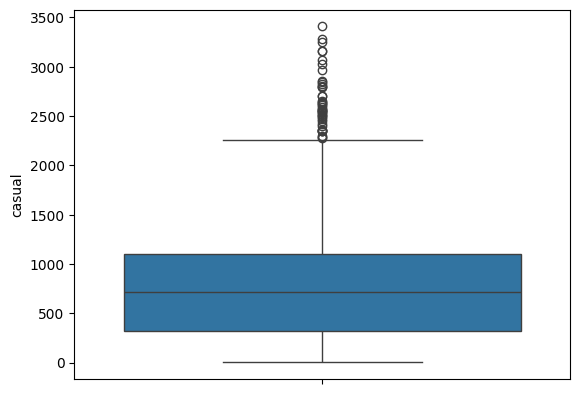

In [12]:
sns.boxplot(df_d['casual'])

<Axes: ylabel='hum'>

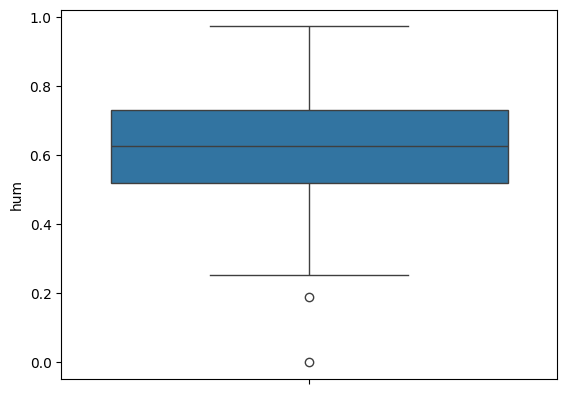

In [13]:
sns.boxplot(df_d['hum'])

detect the skew by function of df[''].skew()

In [14]:
df_d['hum'].skew()


np.float64(-0.06978343399095213)

In [15]:
df_d['windspeed'].skew()


np.float64(0.6773454211095378)

In [16]:
df_h['windspeed'].skew()



np.float64(0.5749052034923136)

In [17]:
df_d['hum'].skew()


np.float64(-0.06978343399095213)

In [18]:
df_h['Log_windspeed_h']=np.log1p(df_h['windspeed'])
#df_h['Log_hum_h']=np.log1p(df_h['hum'])
df_h['Log_temp_h']=np.log1p(df_h['temp'])
df_d['Log_windspeed_d']=np.log1p(df_d['windspeed'])
#df_d['Log_hum_d']=np.log1p(df_d['hum'])
df_d['Log_temp_d']=np.log1p(df_d['temp'])
df_h["Log_casual_h"]=np.log1p(df_h["casual"])
df_d["Log_casual_d"]=np.log1p(df_h["casual"])

#

cheack skew again after applying log1p log of X+1  on the data

In [19]:
df_d['windspeed'].skew()


np.float64(0.6773454211095378)

In [20]:
df_d['temp'].skew()

np.float64(-0.054520964760408276)

In [21]:
print(df_d['windspeed'].skew())
print(df_h['windspeed'].skew())
print(df_d['Log_windspeed_d'].skew())
print(df_h['Log_windspeed_h'].skew())

0.6773454211095378
0.5749052034923136
0.4972196964650753
0.26392591843816077


cheack unqiq values and repation
1st define the fun
2nd apply the fun
to understand more the data


In [33]:
def columns_info(data):
  cols=[]
  dtype=[]
  unique_v=[]
  n_unique=[]

  for col in df_h.columns:
    cols.append(col)
    dtype.append(df_h[col].dtypes)
    unique_v.append(df_h[col].unique())
    n_unique.append(df_h[col].nunique())

    for col in df_d.columns:
      cols.append(col)
      dtype.append(df_d[col].dtypes)
      unique_v.append(df_d[col].unique())
      n_unique.append(df_d[col].nunique())

  return pd.DataFrame({'columns':cols,'dtype':dtype,'unique_sample':unique_v, 'n_uniques':n_unique})

In [34]:
columns_info(df_h)


,columns,dtype,unique_sample,n_uniques
0,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",17379
1,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",731
2,dteday,object,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...",731
3,season,int64,"[1, 2, 3, 4]",4
4,yr,int64,"[0, 1]",2
...,...,...,...,...
395,registered,int64,"[654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...",679
396,cnt,int64,"[985, 801, 1349, 1562, 1600, 1606, 1510, 959, ...",696
397,Log_windspeed_d,float64,"[0.14880441398233832, 0.22197406773479278, 0.2...",650
398,Log_temp_d,float64,"[0.29577449033420733, 0.3100387882265085, 0.17...",499


In [35]:
columns_info(df_d)

,columns,dtype,unique_sample,n_uniques
0,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",17379
1,instant,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",731
2,dteday,object,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...",731
3,season,int64,"[1, 2, 3, 4]",4
4,yr,int64,"[0, 1]",2
...,...,...,...,...
395,registered,int64,"[654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...",679
396,cnt,int64,"[985, 801, 1349, 1562, 1600, 1606, 1510, 959, ...",696
397,Log_windspeed_d,float64,"[0.14880441398233832, 0.22197406773479278, 0.2...",650
398,Log_temp_d,float64,"[0.29577449033420733, 0.3100387882265085, 0.17...",499


Make featuers selection
model in ML determine the importance of Feauters

In [22]:
from sklearn.ensemble import RandomForestRegressor


In [25]:
x_d=df_d.drop(columns=['casual','windspeed','cnt','temp'])
y_d=df_d['cnt']
x_h=df_h.drop(columns=['casual','windspeed','cnt','temp'])
y_h=df_h['cnt']

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #n_estmaitors is descion tree besdie each other
#كم Descion tree جنب بعض
#Desction treee  ده مش train مجردب بيعمل كم احاصئه عشان يشةف مين الى مهم
rf_model.fit(x_d, y_d)
rf_model.fit(x_h,y_h)


ValueError: could not convert string to float: '2011-01-01'